In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/8월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.524194,0.516129,1.015625,0.173193,2.545214,1.705488,5.872572,3.935072
1,중랑구,(구)신한은행 중랑교지점,1,0.419355,0.411290,1.019608,0.174861,2.556623,1.715305,7.388527,4.957155
2,중랑구,(구)신한은행 중랑교지점,2,0.298387,0.362903,0.822222,0.096680,1.942140,1.199409,7.205408,4.449853
3,중랑구,(구)신한은행 중랑교지점,3,0.217742,0.193548,1.125000,0.219271,2.840629,1.962309,16.709835,11.543168
4,중랑구,(구)신한은행 중랑교지점,4,0.120968,0.120968,1.000000,0.166667,2.500000,1.666667,24.800000,16.533333
...,...,...,...,...,...,...,...,...,...,...,...
52505,강서구,힐스테이트에코,20,0.983871,1.217742,0.807947,0.052738,2.431989,1.666652,2.609476,1.788284
52506,강서구,힐스테이트에코,21,0.846774,0.919355,0.921053,0.092092,3.071381,2.235150,3.995070,2.907351
52507,강서구,힐스테이트에코,22,0.758065,0.733871,1.032967,0.139641,3.670091,2.781369,5.627185,4.264547
52508,강서구,힐스테이트에코,23,0.500000,0.580645,0.861111,0.069892,2.733349,1.932423,5.877488,4.155266


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.524194,0.516129,1.015625,2.545214,5.872572
1,중랑구,(구)신한은행 중랑교지점,1,0.419355,0.411290,1.019608,2.556623,7.388527
2,중랑구,(구)신한은행 중랑교지점,2,0.298387,0.362903,0.822222,1.942140,7.205408
3,중랑구,(구)신한은행 중랑교지점,3,0.217742,0.193548,1.125000,2.840629,16.709835
4,중랑구,(구)신한은행 중랑교지점,4,0.120968,0.120968,1.000000,2.500000,24.800000


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.125799,0.23004,0.201607,0.423299,0.314456,0.299094,0.264789,0.177177,0.335014,0.207656,0.303245,0.22798,0.337547,0.199109,0.169525,0.268398,0.247283,0.260555,0.34916,0.376555,0.192481,0.238161,0.197267,0.172923,0.242602


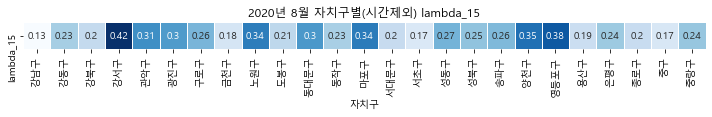

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.148913,0.294063,0.213707,0.524745,0.464363,0.4336,0.359459,0.253749,0.371252,0.238787,0.308757,0.299162,0.447446,0.263666,0.2473,0.377163,0.299955,0.294383,0.383187,0.525216,0.259971,0.347059,0.232759,0.20518,0.264518


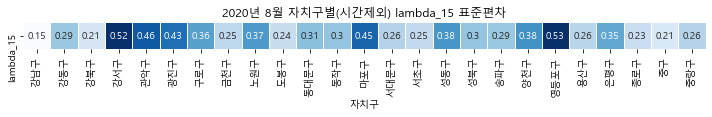

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.13217,0.225596,0.201589,0.420145,0.314238,0.298114,0.261406,0.180108,0.332762,0.203265,0.294905,0.224387,0.337599,0.201206,0.174476,0.264884,0.246047,0.258189,0.34472,0.379229,0.191445,0.229897,0.212621,0.188688,0.237088


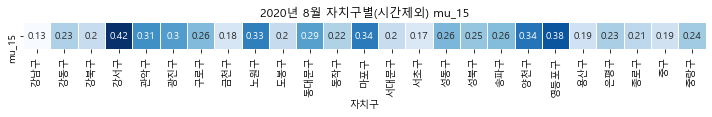

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.154118,0.27803,0.212898,0.516418,0.439701,0.414123,0.364561,0.252755,0.364961,0.225807,0.296357,0.27004,0.432489,0.237497,0.238186,0.355905,0.274269,0.287919,0.374448,0.517025,0.250249,0.306909,0.258148,0.23101,0.239968


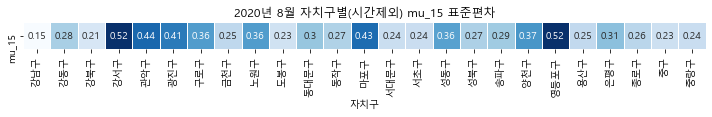

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.046532,1.043894,1.081785,1.149386,1.019105,0.940454,1.174612,1.473198,1.017621,1.122444,1.099946,1.003438,1.084464,1.049298,1.043962,1.124435,1.02269,1.042883,1.076782,1.02756,1.049324,1.074449,1.00913,1.047359,1.062942


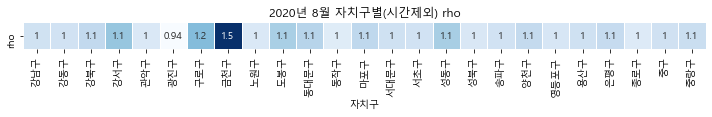

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.390023,0.964046,0.830991,2.199036,1.512412,1.429389,1.192661,0.698885,1.584274,0.907716,1.478883,1.111367,1.656627,0.846238,0.705949,1.243848,1.17014,1.179562,1.871557,1.948703,0.911444,1.192587,0.888033,0.722613,1.081384


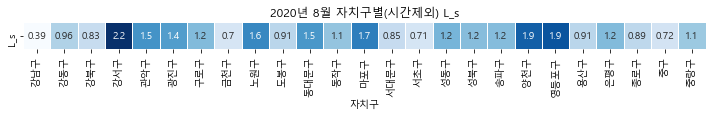

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.575746,1.215823,0.928005,2.462237,2.202345,1.945347,1.532313,0.906453,1.621144,1.105375,1.303808,1.433453,1.921645,1.143371,1.092925,1.622308,1.449918,1.322788,1.808024,2.64239,1.112563,1.873623,0.951498,0.835161,1.082797


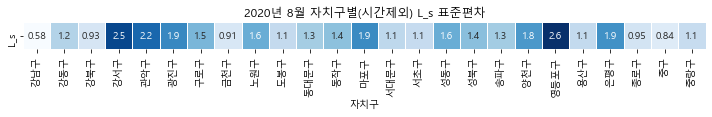

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,6.35815,8.849453,8.701974,14.739788,9.487076,10.743538,12.059423,13.205518,11.300546,10.377622,12.223058,9.662457,13.686066,10.658377,10.511705,11.546074,10.335238,11.628531,15.846138,15.205375,11.531637,10.544784,13.740172,12.087175,8.986616


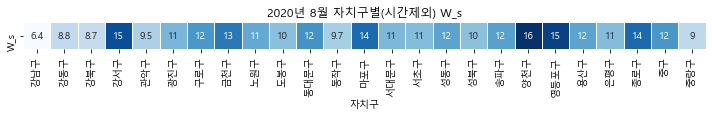

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,15.13734,21.367251,15.213977,37.472156,17.435592,26.654373,31.120296,38.994857,28.197866,19.802001,25.677102,20.52941,34.994725,21.064581,29.711548,26.252331,18.161435,29.365974,40.937792,43.413896,31.116655,36.595851,34.46368,32.184498,15.679661


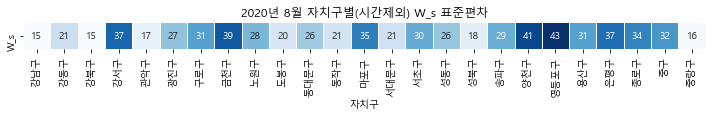

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.097005  0.095822  0.090891  0.068747  0.041711  0.026705  0.034109   
강동구  0.176771  0.171071  0.143440  0.094575  0.060576  0.053794  0.089901   
강북구  0.172939  0.200423  0.182460  0.134164  0.094868  0.058944  0.050733   
강서구  0.243506  0.243079  0.167233  0.119209  0.085533  0.067571  0.130926   
관악구  0.264516  0.288418  0.209322  0.165078  0.110215  0.095674  0.089809   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.094130  0.152763  0.120902  0.097303  0.101335  0.116142  0.105235   
강동구  0.150018  0.268328  0.173204  0.146353  0.169263  0.191074  0.196298   
강북구  0.088270  0.161584  0.107331  0.115543  0.130205  0.164809  0.153372   
강서구  0.270833  0.571542  0.324108  0.273888  0.293194  0.338526  0.365286   
관악구  0.141251  0.249633  0.185973  0.181818  0.193671  0.220674  0.236315   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.108144  0.121959  0.146682  0.200952  0.275582  0.231623  0.199762   
강동구  0.195015  0.222049  0.265396  0.339168  0.474798  0.443090  0.395436   
강북구  0.176540  0.193548  0.230205  0.295748  0.401760  0.370528  0.355718   
강서구  0.356183  0.417094  0.536229  0.744685  1.049304  0.906403  0.785679   
관악구  0.235459  0.275782  0.320015  0.459311  0.696848  0.662512  0.613881   

                                   
시간         21        22        23  
자치구                                
강남구  0.184294  0.179931  0.132932  
강동구  0.423845  0.419630  0.277401  
강북구  0.364370  0.353666  0.294868  
강서구  0.775049  0.687072  0.502566  
관악구  0.621701  0.592742  0.463832

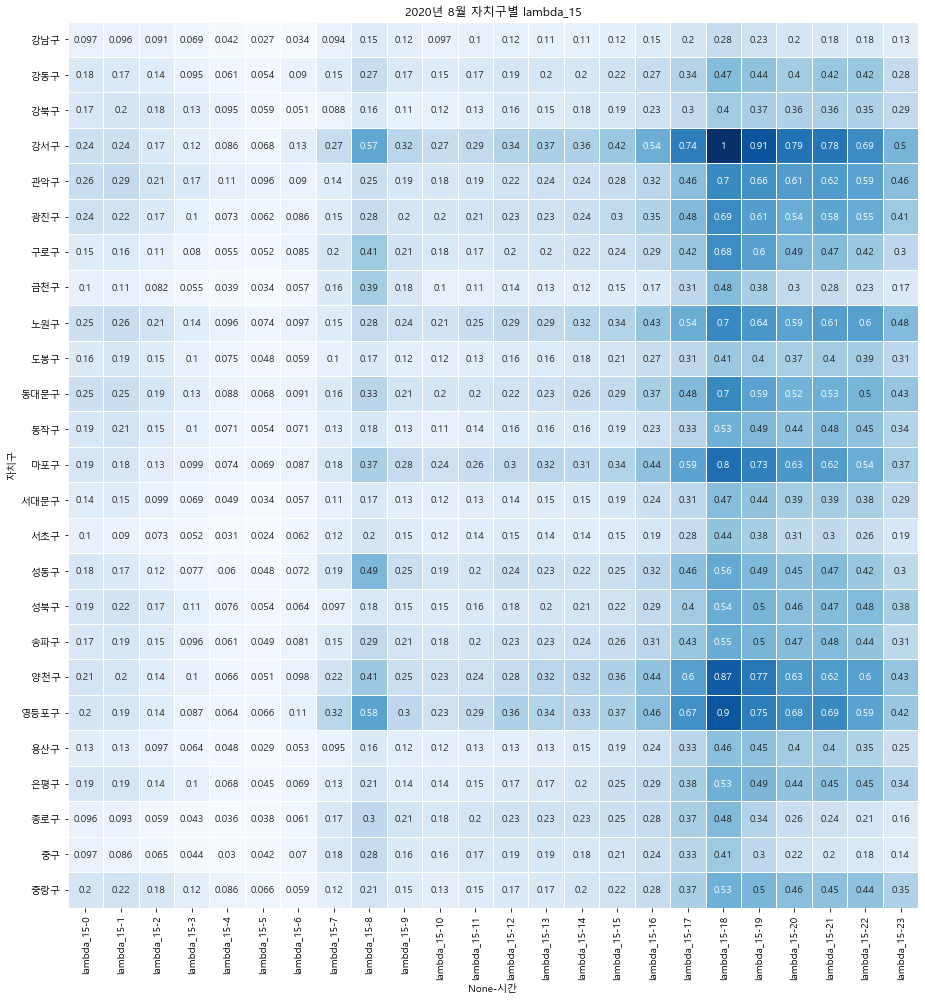

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.107302  0.099190  0.093037  0.084105  0.053279  0.040450  0.058134   
강동구  0.223307  0.205962  0.171189  0.110384  0.082069  0.063249  0.116074   
강북구  0.198414  0.191911  0.157361  0.130898  0.081772  0.061160  0.056764   
강서구  0.288329  0.242566  0.160721  0.112787  0.086684  0.076756  0.189753   
관악구  0.363468  0.323311  0.250945  0.197186  0.129407  0.116230  0.125517   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.137515  0.217420  0.147054  0.097806  0.090903  0.104001  0.097856   
강동구  0.204342  0.389906  0.199958  0.150310  0.169231  0.182399  0.197316   
강북구  0.100623  0.198367  0.099230  0.107863  0.110993  0.142944  0.128485   
강서구  0.408541  0.668460  0.343792  0.282576  0.296149  0.295511  0.348814   
관악구  0.267325  0.355629  0.227541  0.208232  0.202791  0.218925  0.233599   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.089068  0.103995  0.125747  0.171603  0.232326  0.210144  0.190110   
강동구  0.211037  0.226464  0.261522  0.334486  0.485449  0.432231  0.371218   
강북구  0.154054  0.139888  0.189999  0.225390  0.324713  0.275811  0.309711   
강서구  0.324812  0.374572  0.481719  0.712997  0.891738  0.737404  0.666434   
관악구  0.240713  0.277884  0.358737  0.541588  0.769479  0.813528  0.757034   

                                   
시간         21        22        23  
자치구                                
강남구  0.182437  0.179555  0.125545  
강동구  0.404874  0.400214  0.268745  
강북구  0.271953  0.264182  0.224891  
강서구  0.635583  0.567273  0.407132  
관악구  0.718231  0.675321  0.507388

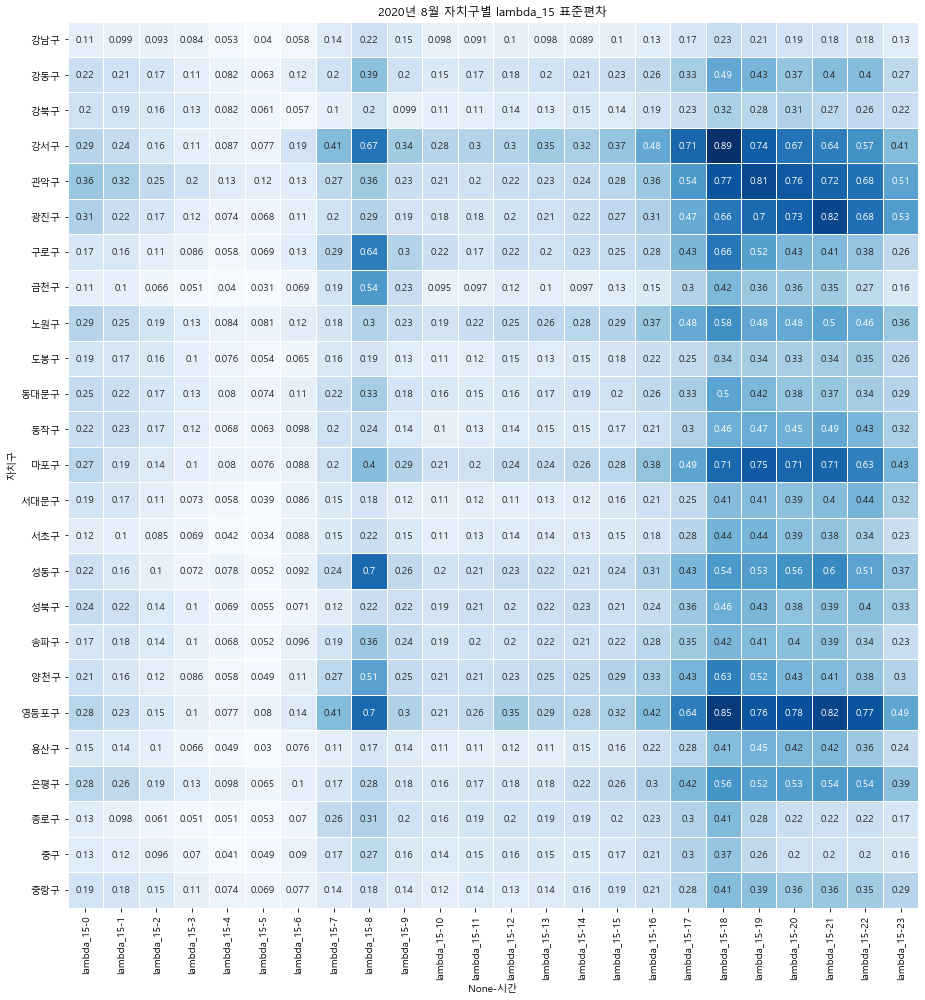

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.090783  0.095758  0.087520  0.066169  0.036555  0.027036  0.044685   
강동구  0.160426  0.149365  0.112178  0.082845  0.049395  0.057826  0.108688   
강북구  0.162087  0.179006  0.152650  0.113196  0.084018  0.053372  0.053666   
강서구  0.212733  0.206017  0.143645  0.109204  0.070137  0.068182  0.149621   
관악구  0.234720  0.232303  0.170066  0.148338  0.089443  0.091764  0.107038   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.085603  0.134915  0.109796  0.101732  0.103120  0.114027  0.108673   
강동구  0.191257  0.286474  0.186675  0.175128  0.179802  0.192907  0.197672   
강북구  0.103666  0.161877  0.128886  0.118328  0.145161  0.153372  0.159971   
강서구  0.319037  0.557490  0.319892  0.289162  0.315860  0.349096  0.374145   
관악구  0.227151  0.321848  0.226051  0.221041  0.209800  0.239125  0.254277   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.125066  0.151111  0.182906  0.290785  0.337057  0.240283  0.200754   
강동구  0.197397  0.237078  0.301870  0.372159  0.452713  0.412023  0.395803   
강북구  0.182845  0.231085  0.257185  0.316716  0.430792  0.361584  0.372581   
강서구  0.377077  0.454607  0.566838  0.842253  1.081256  0.881476  0.787329   
관악구  0.252077  0.302419  0.358993  0.512586  0.668255  0.642717  0.613270   

                                   
시간         21        22        23  
자치구                                
강남구  0.187136  0.151705  0.106491  
강동구  0.388013  0.331653  0.219208  
강북구  0.367302  0.307918  0.262903  
강서구  0.725501  0.581623  0.411474  
관악구  0.586022  0.508675  0.370479

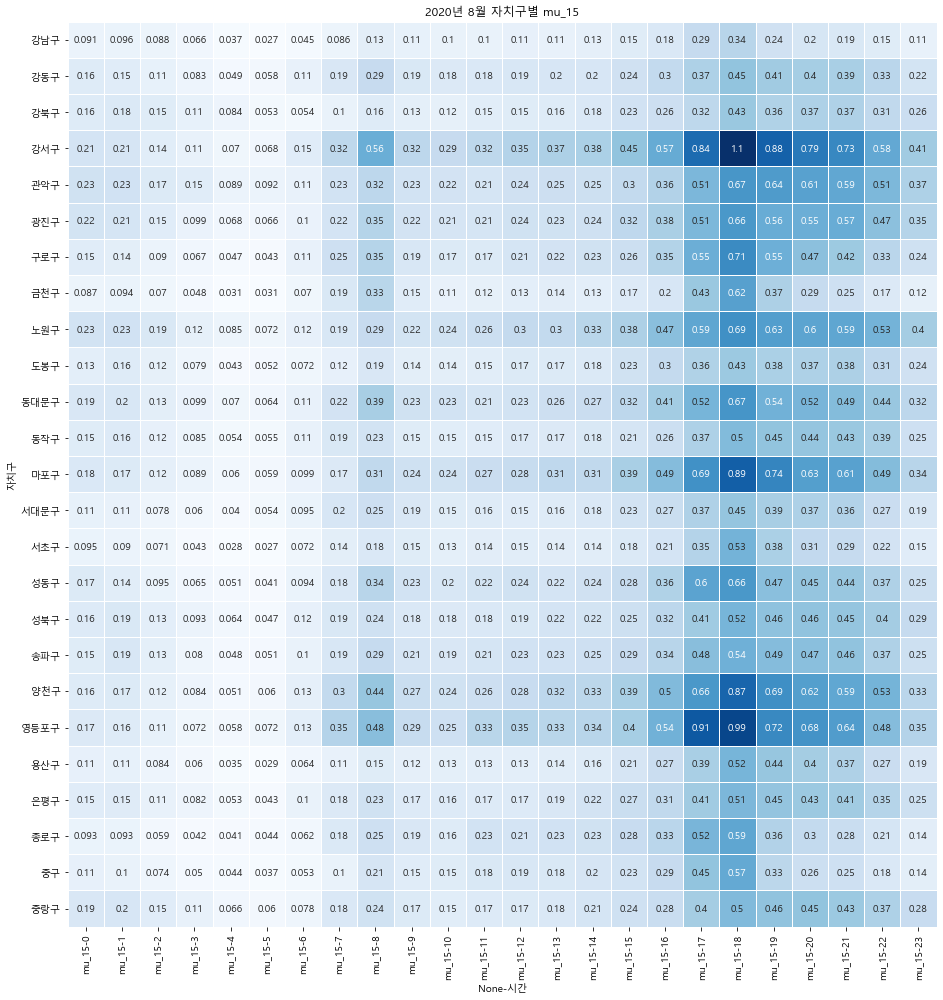

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.087145  0.086828  0.078959  0.070754  0.041578  0.030773  0.060279   
강동구  0.212969  0.183674  0.142513  0.102599  0.063156  0.060426  0.114566   
강북구  0.187058  0.162668  0.155306  0.108785  0.084206  0.046236  0.049524   
강서구  0.274234  0.211922  0.147157  0.115020  0.073142  0.068389  0.157201   
관악구  0.351736  0.297385  0.199402  0.199675  0.122089  0.099303  0.131912   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.092552  0.168679  0.099828  0.084502  0.088185  0.103017  0.096547   
강동구  0.184836  0.303473  0.209165  0.163239  0.178147  0.191026  0.199149   
강북구  0.085367  0.137683  0.096930  0.084125  0.112935  0.112267  0.126294   
강서구  0.299086  0.537147  0.258410  0.221984  0.239662  0.267536  0.302525   
관악구  0.293383  0.345677  0.241791  0.218079  0.190235  0.223349  0.217782   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.099216  0.126380  0.145351  0.260202  0.276755  0.205739  0.170942   
강동구  0.198502  0.237698  0.291894  0.366507  0.451375  0.394853  0.388433   
강북구  0.135888  0.170278  0.198371  0.240219  0.360064  0.293154  0.308911   
강서구  0.311186  0.361222  0.470404  0.723786  0.987413  0.772684  0.688794   
관악구  0.227740  0.303806  0.357819  0.509717  0.713235  0.766995  0.709878   

                                   
시간         21        22        23  
자치구                                
강남구  0.183528  0.147020  0.102424  
강동구  0.376503  0.344115  0.226291  
강북구  0.293088  0.251470  0.207260  
강서구  0.643625  0.513587  0.387502  
관악구  0.700667  0.634027  0.449839

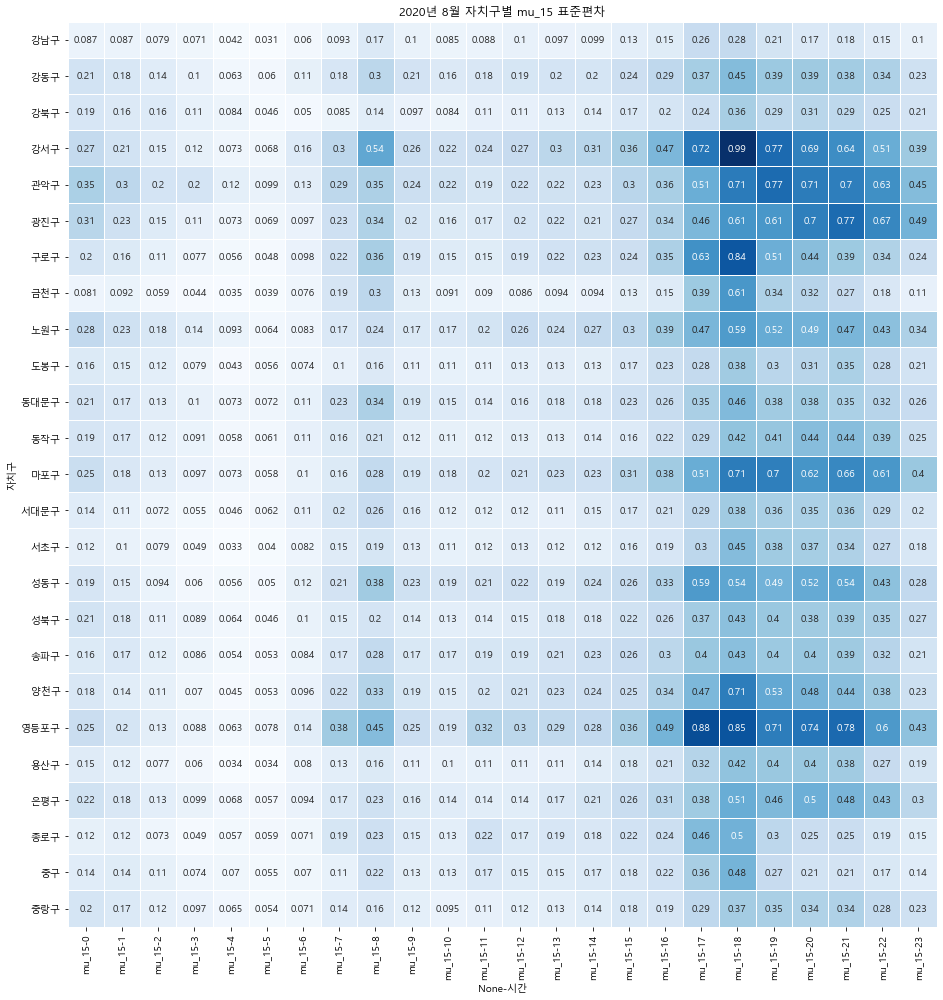

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.866532  0.995572  1.078399  1.007030  1.102891  1.128899  0.880721   
강동구  0.919738  1.228843  1.196786  1.180724  0.971230  1.049538  1.513740   
강북구  0.732144  1.150594  1.419717  1.399264  1.742605  1.439988  0.966168   
강서구  0.996882  1.190504  1.509238  1.286407  1.318415  1.499977  1.721539   
관악구  0.726098  1.215950  1.237784  1.203249  1.513163  1.307029  1.427219   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.540806  1.426222  1.285931  0.952874  1.067608  1.049505  0.954939   
강동구  0.870304  0.809583  0.910992  0.837288  0.905514  1.032376  0.955038   
강북구  1.027738  0.980370  0.976567  0.981392  0.876379  1.166508  0.975366   
강서구  1.487144  1.584590  1.066769  0.900210  0.822344  0.863325  0.871175   
관악구  0.779481  0.916014  0.883437  0.815981  0.835723  1.025033  0.846585   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.940785  0.850442  0.822274  0.708724  0.850795  0.945880  0.952259   
강동구  0.935537  0.944342  0.889096  0.921358  1.103133  1.043825  1.025735   
강북구  0.952119  0.898972  0.926290  1.044826  1.003309  1.109258  0.914557   
강서구  0.865252  0.825389  0.891880  0.849299  1.023744  0.991932  0.944624   
관악구  0.849626  0.846776  0.863980  0.780550  1.002152  0.946757  0.923998   

                                   
시간         21        22        23  
자치구                                
강남구  0.990952  1.174636  1.570747  
강동구  1.122737  1.390500  1.315009  
강북구  1.021600  1.210194  1.198547  
강서구  1.085511  1.601798  1.447760  
관악구  1.038222  1.283476  1.294452

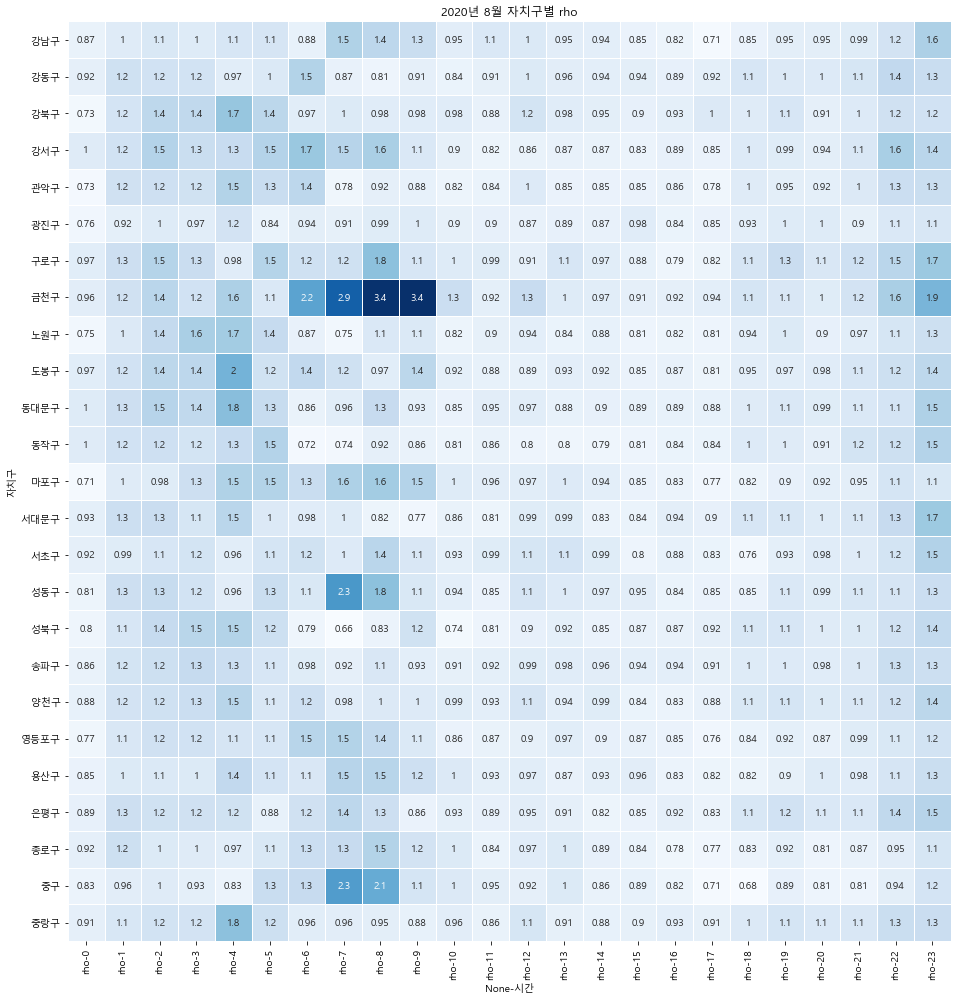

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.380991  0.393725  0.413195  0.375471  0.385807  0.311995  0.304396   
강동구  0.838090  1.018957  1.161030  1.087137  1.067596  0.864552  0.880337   
강북구  0.613682  0.843928  0.941229  0.909866  0.876836  0.901350  0.875802   
강서구  1.705330  2.318746  2.377187  2.360832  2.358405  2.296315  1.939514   
관악구  1.237723  1.768479  1.863443  1.815938  1.854011  1.682492  1.185391   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.391831  0.412997  0.415695  0.413992  0.415020  0.419797  0.406303   
강동구  0.769930  0.864478  0.909871  0.807254  0.938614  0.935108  0.980714   
강북구  0.762575  0.803574  0.753803  0.833842  0.811075  0.946184  0.857232   
강서구  1.898060  1.800474  1.958273  2.080820  2.238721  2.248148  2.277624   
관악구  0.983523  1.238321  1.255310  1.155692  1.455586  1.390998  1.453787   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.380302  0.363082  0.363062  0.328178  0.369284  0.406443  0.407945   
강동구  0.972090  0.941190  0.870016  0.914270  1.020150  1.030458  0.953859   
강북구  0.826583  0.734498  0.783866  0.819753  0.793187  0.855373  0.814337   
강서구  2.149231  2.142465  2.282820  2.280481  2.251908  2.308227  2.238055   
관악구  1.489791  1.379877  1.399920  1.501537  1.655313  1.666577  1.626079   

                                   
시간         21        22        23  
자치구                                
강남구  0.401585  0.446528  0.454104  
강동구  1.044831  1.148260  1.146680  
강북구  0.842814  0.925645  0.916052  
강서구  2.383976  2.529809  2.557640  
관악구  1.670615  1.775790  1.878485

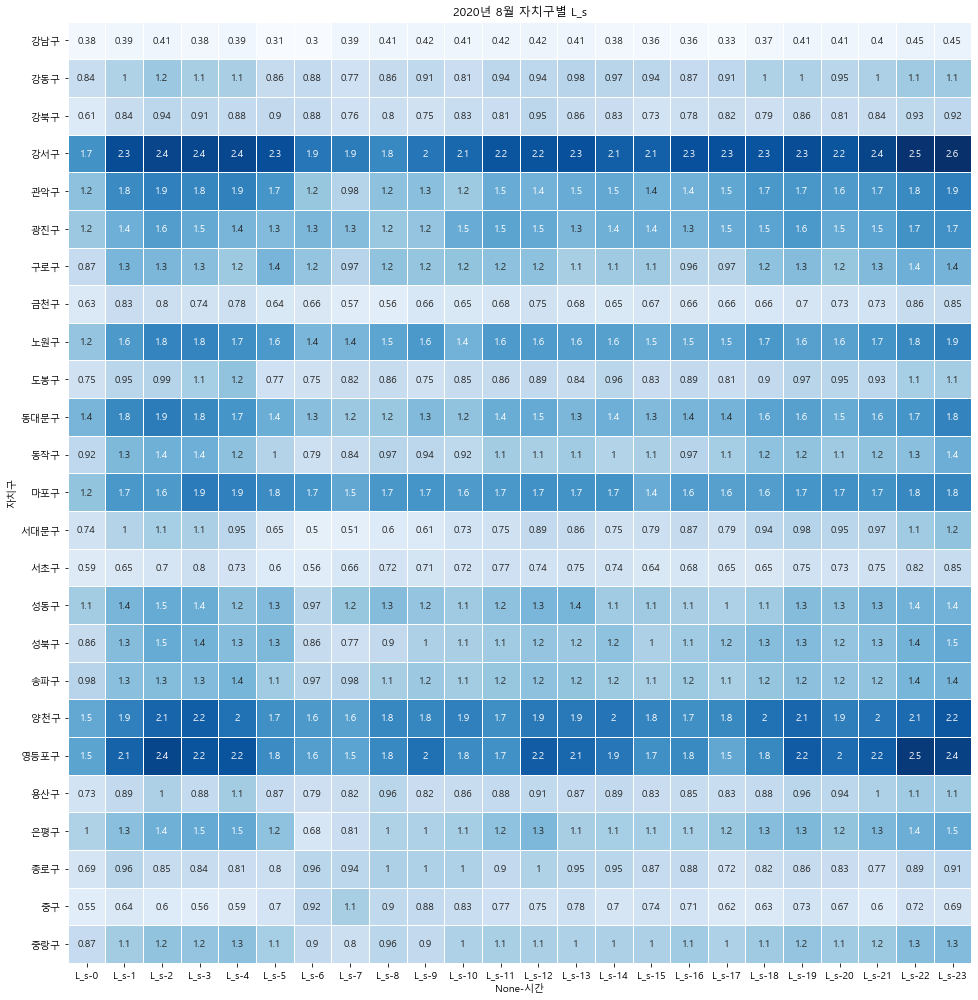

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.642964  0.618390  0.652646  0.554606  0.620806  0.521839  0.544154   
강동구  1.213977  1.374864  1.483088  1.355634  1.546472  1.297785  1.555343   
강북구  0.906038  0.937143  0.971752  1.041441  1.068724  1.111256  1.169264   
강서구  2.304919  2.463996  2.397523  2.475874  2.743560  3.197692  2.963178   
관악구  2.265680  2.449925  2.675875  2.685235  2.416108  2.888533  2.061856   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.619386  0.583875  0.615756  0.660057  0.591547  0.609523  0.583462   
강동구  1.091244  1.242633  1.207028  0.931242  1.076835  0.984963  1.250592   
강북구  0.981898  0.915310  0.949400  0.924671  0.915306  1.082989  0.917671   
강서구  2.956928  2.410181  2.385199  2.604676  2.687294  2.261347  2.486019   
관악구  2.018115  2.237130  1.844751  1.618000  2.355249  2.078057  2.197916   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.518423  0.492041  0.493202  0.437431  0.481769  0.551822  0.577216   
강동구  1.137389  1.060433  0.993907  1.009320  1.159344  1.220330  1.024709   
강북구  0.912479  0.694155  0.758737  0.836418  0.780153  0.882440  0.814936   
강서구  2.201900  2.277001  2.302378  2.358400  2.100154  2.088312  2.016291   
관악구  2.018908  1.520750  1.807248  2.076864  2.236417  2.145708  2.210219   

                                   
시간         21        22        23  
자치구                                
강남구  0.533711  0.608027  0.646672  
강동구  1.126061  1.224319  1.352711  
강북구  0.831258  0.882402  0.949171  
강서구  2.272124  2.394931  2.399553  
관악구  2.071693  2.113610  2.303747

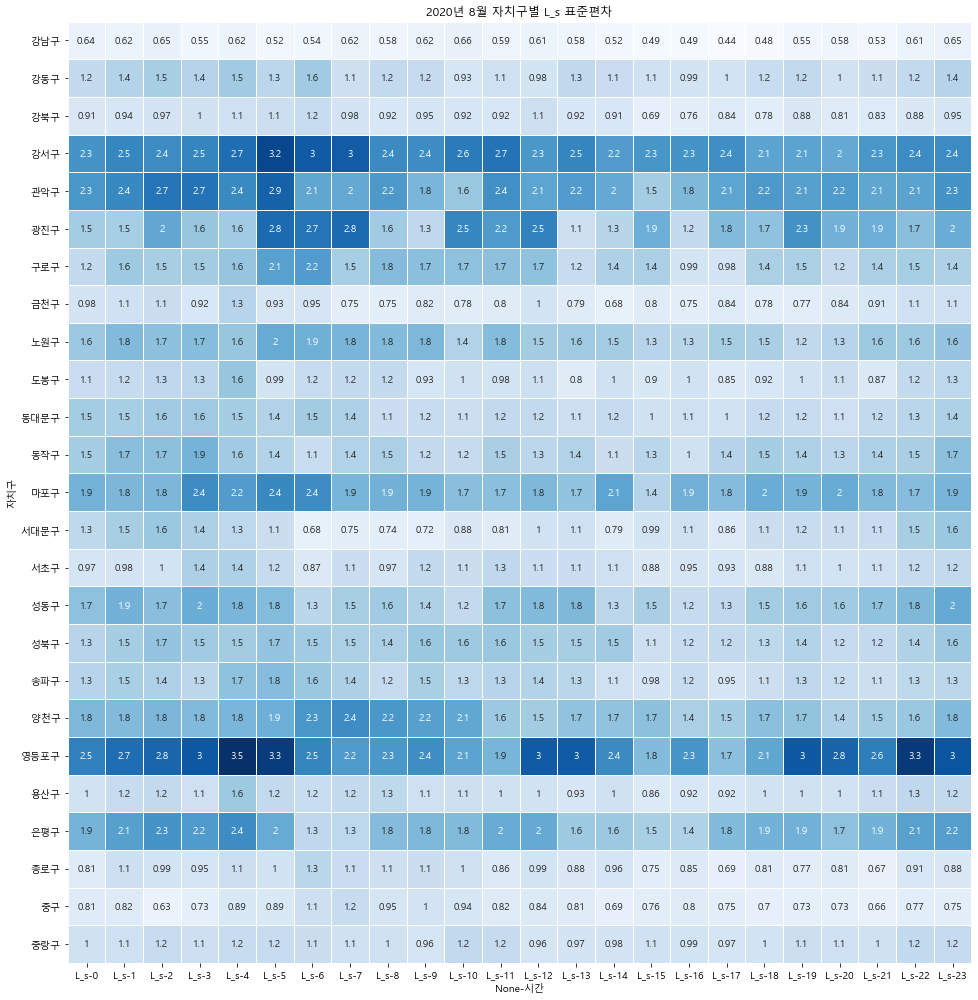

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구   4.718272   6.711214   7.407402  11.138967  17.215239  20.692066   
강동구   5.175395  10.381889  13.743310  19.414066  32.191153  30.807675   
강북구   3.721091   8.260964  10.265578  11.447953  16.333900  29.453205   
강서구  11.026389  16.285978  29.990288  44.610467  54.755237  60.258205   
관악구   4.086977   8.214869  13.972861  18.141956  30.550905  25.653402   

                                                                              \
시간          6          7         8         9          10        11        12   
자치구                                                                            
강남구  15.297948   7.172976  5.824850  6.072826   6.128843  5.538706  4.804876   
강동구  18.292743   6.296748  4.440341  7.575811   6.594518  6.643966  6.285358   
강북구  24.697854  13.533642  9.232304  9.453801  11.046070  7.939223  8.026347   
강서구  31.949686  10.772912  5.592900  8.357783   9.484713  8.482657  7.401097   
관악구  29.513198  11.621998  6.672942  8.397478   7.944240  7.988510  7.517879   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  4.920076  4.408116  3.387529  2.686179  1.746811  1.452888  1.958876   
강동구  6.565122  6.302080  5.096032  3.567646  3.296556  2.602278  2.689174   
강북구  7.578365  6.504743  5.317423  4.579900  3.709493  2.742016  3.074411   
강서구  7.257969  6.795151  5.530046  4.880020  3.457798  2.746486  3.044850   
관악구  6.910119  6.563609  5.899886  4.710225  3.427022  2.925115  3.019606   

                                             
시간         20        21        22        23  
자치구                                          
강남구  2.325785  2.696590  3.221022  5.295019  
강동구  2.722901  3.017497  3.609504  5.917039  
강북구  3.030916  3.139240  3.824494  4.308715  
강서구  3.389053  3.916654  6.425613  8.527351  
관악구  3.080139  3.266529  4.222046  5.740808

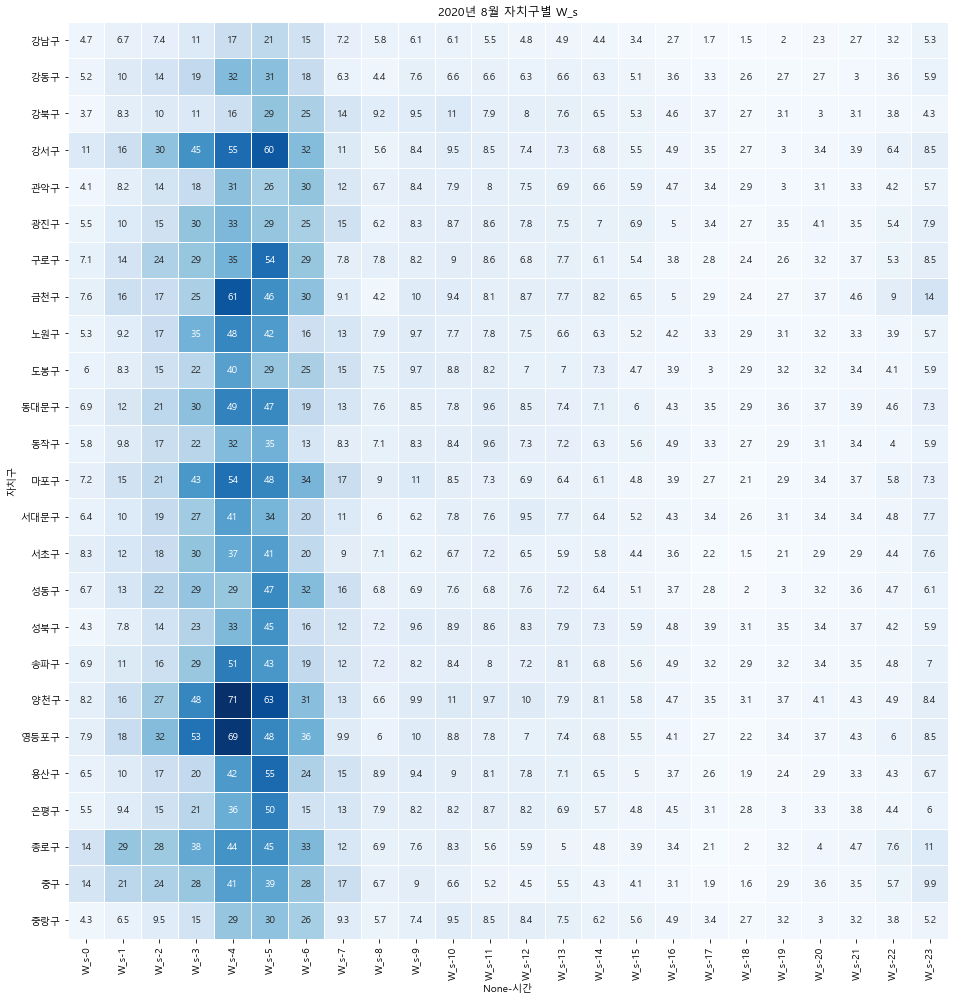

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구   7.643970  14.045791  10.547076  20.697426  31.588596  37.390609   
강동구   6.858504  22.701827  16.305900  25.039133  50.448919  61.956077   
강북구   5.150611  16.738324  12.943733  12.140260  21.964523  43.712916   
강서구  27.358399  23.945245  42.098055  80.520652  80.078665  84.776371   
관악구   4.764679   7.640773  18.372565  22.263109  31.364157  30.005427   

                                                                      \
시간          6          7          8          9          10        11   
자치구                                                                    
강남구  31.111931  10.270379  12.571241  10.239477  12.528078  7.380611   
강동구  35.907314   6.600588   4.394892   9.338054   6.503318  5.760544   
강북구  27.260749  16.958062  11.280959   9.583196  11.833389  6.576057   
강서구  60.978895  14.239583   8.670098   7.591377  11.927676  6.718820   
관악구  50.112544  17.827696   6.719478   7.770789   6.890382  5.641621   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  6.302521  6.161733  6.218478  4.222725  3.269788  2.126355  1.735419   
강동구  5.517435  7.847037  5.735923  4.678817  2.862625  3.184589  2.205901   
강북구  6.705653  6.425904  5.480443  6.213246  4.594012  3.267915  2.316660   
강서구  4.918189  6.382573  4.239826  3.538598  3.442225  2.594304  2.108811   
관악구  5.821246  5.168439  4.366347  3.983013  2.913614  2.247865  1.987024   

                                                        
시간         19        20        21         22        23  
자치구                                                     
강남구  2.219539  2.656489  3.460644   3.902722  8.138303  
강동구  2.082207  2.101828  2.724552   2.881161  6.150197  
강북구  2.116299  2.202962  2.338994   2.880301  3.231716  
강서구  1.840309  1.973897  2.521770  11.933326  7.824140  
관악구  2.137756  1.909524  1.985956   3.273903  4.113517

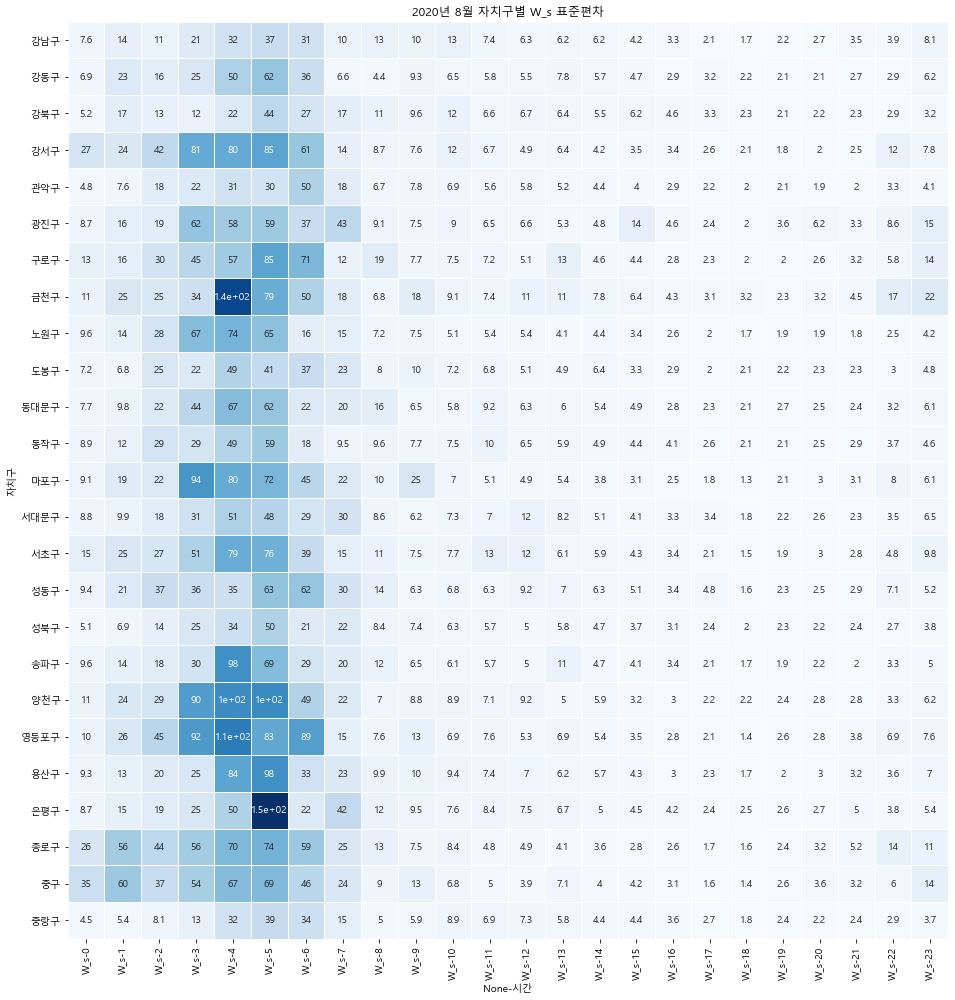

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2144,흑석한강푸르지오 106동앞
2145,흑석한강푸르지오(110동)
2146,흥국사 정류장
2147,희성오피앙


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['건국대학교 (입학정보관)',
 'KC 대학교',
 '가락고등학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 ??',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '묘곡초등학교',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학교 앞',
 '서울과학기술대학교(어학교육원)',
 '서울대학교 정문',
 '서울도봉초등학교인근',
 '서울디자인

In [43]:
len(school)

131

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
1214,광진구,건국대학교 (입학정보관),0,0.112903,0.129032,0.875000,1.734979,18.087906,학교
1215,광진구,건국대학교 (입학정보관),1,0.048387,0.072581,0.666667,1.241706,27.767521,학교
1216,광진구,건국대학교 (입학정보관),2,0.064516,0.040323,1.600000,2.860439,75.728954,학교
1217,광진구,건국대학교 (입학정보관),3,0.032258,0.008065,4.000000,3.671554,456.611765,학교
1218,광진구,건국대학교 (입학정보관),4,0.032258,0.048387,0.666667,1.241706,41.651282,학교
...,...,...,...,...,...,...,...,...,...
52260,동대문구,휘봉고등학교 앞,19,0.346774,0.282258,1.228571,1.136274,5.495971,학교
52261,동대문구,휘봉고등학교 앞,20,0.306452,0.322581,0.950000,0.965819,4.610256,학교
52262,동대문구,휘봉고등학교 앞,21,0.370968,0.306452,1.210526,1.126601,5.050125,학교
52263,동대문구,휘봉고등학교 앞,22,0.362903,0.161290,2.250000,1.488722,10.492308,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 '??곡역 1번 출구 앞',
 '화곡역 1번 출구 앞',
 '?ㅘ?문역 5번출구',
 '광화문역 5번출구',
 '?低걋甄諛貶貶?번출구',
 '어린이대공원역6번출구',
 '?煇?역 3번출구 뒤',
 '혜화역 3번출구 뒤',
 '?竊봇?3번 출구',
 '삼성역 3번 출구',
 '?箚瓦?4번출구)',
 '상계??4번출구)',
 '상계역(4번출구)',
 '?酉?진역 5번출구',
 '노량진역 5번출구',
 '?도箸貪맡뼁?1번출구',
 '영등포구청역 1번출구',
 '?탔譴?역 1번출구',
 '신이문역 1번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가?玲?8번출구',
 '가양역 8번출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고려대학교 2번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공?た?1번 출구 앞',
 '공릉역 1번 출구 앞',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나?玲?3번 출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 2번출구 앞',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞

In [46]:
len(subway)

434

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
73,강남구,3호선 매봉역 3번출구앞,0,0.153226,0.153226,1.000000,1.000000,9.789474,지하철
74,강남구,3호선 매봉역 3번출구앞,1,0.153226,0.201613,0.760000,0.819302,7.101818,지하철
75,강남구,3호선 매봉역 3번출구앞,2,0.072581,0.120968,0.600000,0.673469,11.366667,지하철
76,강남구,3호선 매봉역 3번출구앞,3,0.080645,0.096774,0.833333,0.879121,15.030303,지하철
77,강남구,3호선 매봉역 3번출구앞,4,0.032258,0.048387,0.666667,0.736842,28.933333,지하철
...,...,...,...,...,...,...,...,...,...
52382,동작구,흑석역 4번출구,19,0.298387,0.483871,0.616667,0.689665,2.854983,지하철
52383,동작구,흑석역 4번출구,20,0.370968,0.354839,1.045455,1.029625,4.258586,지하철
52384,동작구,흑석역 4번출구,21,0.338710,0.395161,0.857143,0.897638,3.698587,지하철
52385,동작구,흑석역 4번출구,22,0.379032,0.395161,0.959184,0.972226,3.769558,지하철


In [48]:
apart

['DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '건영아파트 앞',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호?愎?대각선 맞은편)',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞',
 '래미안금호하이리버 아파트 102동 옆',
 '래미안라센트아파트 103동 앞',
 '래미안신공덕3차아파트',
 '래미안월곡아파트 입구',
 '리센츠아파트',
 '마천금호어울림 1차아파트 건너편',
 '멤피스아파트 앞',
 '면목 대원칸타빌아파트',
 '면목도시개발아파트 1동 앞',
 '면목삼익아파트 앞',
 '목동11단지 아파트',
 '목동1단지아파트 118동 앞',
 '

In [49]:
len(apart)

185

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
1459,서대문구,DMC센트럴아이파크아파트,0,0.201613,0.217742,0.925926,0.480769,4.592593,아파트
1460,서대문구,DMC센트럴아이파크아파트,1,0.250000,0.177419,1.409091,0.584906,5.636364,아파트
1461,서대문구,DMC센트럴아이파크아파트,2,0.177419,0.153226,1.157895,0.536585,6.526316,아파트
1462,서대문구,DMC센트럴아이파크아파트,3,0.088710,0.064516,1.375000,0.578947,15.500000,아파트
1463,서대문구,DMC센트럴아이파크아파트,4,0.064516,0.080645,0.800000,0.444444,12.400000,아파트
...,...,...,...,...,...,...,...,...,...
51549,서대문구,홍은센트레빌 아파트 앞,19,0.137097,0.177419,0.772727,0.000000,0.000000,아파트
51550,서대문구,홍은센트레빌 아파트 앞,20,0.120968,0.153226,0.789474,0.000000,0.000000,아파트
51551,서대문구,홍은센트레빌 아파트 앞,21,0.120968,0.112903,1.071429,0.000000,0.000000,아파트
51552,서대문구,홍은센트레빌 아파트 앞,22,0.185484,0.096774,1.916667,0.000000,0.000000,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공원',
 '솔밭공원역',
 '송이공원',
 '신내능말공원',
 '신내어울공원 앞',
 '신도림테크노근린공원',
 '신트리공원 입구',
 '앙카라공원 앞',
 '양지근린공원앞',
 '어린이대공원정문',
 '연

In [52]:
len(park)

105

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
3608,마포구,가온문화공원,0,0.040323,0.072581,0.555556,0.629139,18.698413,공원
3609,마포구,가온문화공원,1,0.088710,0.016129,5.500000,1.795918,114.461538,공원
3610,마포구,가온문화공원,2,0.016129,0.040323,0.400000,0.461538,31.885714,공원
3611,마포구,가온문화공원,3,0.016129,0.040323,0.400000,0.461538,31.885714,공원
3612,마포구,가온문화공원,4,0.016129,0.040323,0.400000,0.461538,31.885714,공원
...,...,...,...,...,...,...,...,...,...
52187,중구,훈련원공원주차장 앞,19,0.153226,0.217742,0.703704,0.770430,6.489533,공원
52188,중구,훈련원공원주차장 앞,20,0.137097,0.233871,0.586207,0.659889,5.856072,공원
52189,중구,훈련원공원주차장 앞,21,0.209677,0.370968,0.565217,0.638917,3.669082,공원
52190,중구,훈련원공원주차장 앞,22,0.217742,0.177419,1.227273,1.135584,8.742115,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,광진구,건국대학교 (입학정보관),0,0.112903,0.129032,0.875000,1.734979,18.087906,학교
1,광진구,건국대학교 (입학정보관),1,0.048387,0.072581,0.666667,1.241706,27.767521,학교
2,광진구,건국대학교 (입학정보관),2,0.064516,0.040323,1.600000,2.860439,75.728954,학교
3,광진구,건국대학교 (입학정보관),3,0.032258,0.008065,4.000000,3.671554,456.611765,학교
4,광진구,건국대학교 (입학정보관),4,0.032258,0.048387,0.666667,1.241706,41.651282,학교
...,...,...,...,...,...,...,...,...,...
20876,중구,훈련원공원주차장 앞,19,0.153226,0.217742,0.703704,0.770430,6.489533,공원
20877,중구,훈련원공원주차장 앞,20,0.137097,0.233871,0.586207,0.659889,5.856072,공원
20878,중구,훈련원공원주차장 앞,21,0.209677,0.370968,0.565217,0.638917,3.669082,공원
20879,중구,훈련원공원주차장 앞,22,0.217742,0.177419,1.227273,1.135584,8.742115,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.180657  0.152674  0.108186  0.077650  0.062135  0.045008  0.071966   
아파트  0.171221  0.171846  0.116632  0.080342  0.053313  0.036486  0.043679   
지하철  0.215983  0.229060  0.174938  0.121153  0.081388  0.079125  0.131968   
학교   0.151104  0.158266  0.108028  0.067102  0.048264  0.029980  0.039153   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.120046  0.227803  0.150307  0.145008  0.157066  0.189631  0.180184   
아파트  0.089538  0.180427  0.115867  0.116783  0.140366  0.163819  0.165606   
지하철  0.259495  0.394697  0.268712  0.238052  0.264828  0.293389  0.303311   
학교   0.076213  0.157227  0.124785  0.116720  0.119860  0.150825  0.153780   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.200384  0.227650  0.294163  0.414747  0.619432  0.560906  0.504378   
아파트  0.167655  0.186704  0.252310  0.356408  0.531125  0.497297  0.419834   
지하철  0.316839  0.357477  0.447692  0.623198  0.846421  0.696261  0.612123   
학교   0.152980  0.169847  0.210970  0.285767  0.418247  0.392083  0.334647   

                                   
시간         21        22        23  
특성                                 
공원   0.507834  0.482181  0.342396  
아파트  0.442546  0.432040  0.321709  
지하철  0.610878  0.548108  0.392318  
학교   0.355701  0.354654  0.276841

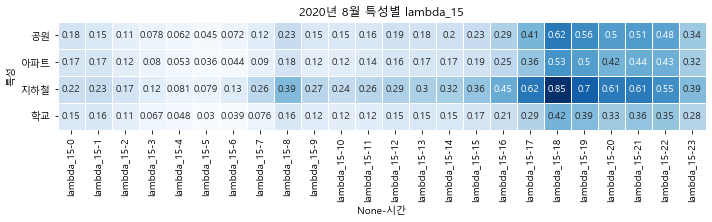

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.227653  0.169414  0.122238  0.086223  0.068392  0.054979  0.085337   
아파트  0.194210  0.163393  0.110088  0.079986  0.058686  0.042300  0.056046   
지하철  0.273908  0.235197  0.170754  0.120092  0.078608  0.085092  0.159224   
학교   0.177739  0.161744  0.116169  0.072320  0.051434  0.030279  0.043648   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.159573  0.254177  0.177272  0.163634  0.147470  0.170976  0.164867   
아파트  0.159320  0.343871  0.122291  0.117090  0.127830  0.163454  0.151828   
지하철  0.318003  0.437082  0.274987  0.224363  0.244723  0.264524  0.277580   
학교   0.092282  0.190344  0.135309  0.120646  0.113238  0.137234  0.143313   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.178329  0.196031  0.254890  0.376866  0.537509  0.497130  0.480862   
아파트  0.150177  0.164134  0.218175  0.288312  0.443172  0.418361  0.346509   
지하철  0.282957  0.320084  0.406910  0.593489  0.774908  0.684686  0.677057   
학교   0.134354  0.166181  0.186412  0.258059  0.395773  0.380100  0.332109   

                                   
시간         21        22        23  
특성                                 
공원   0.498113  0.475472  0.342815  
아파트  0.379486  0.374567  0.270790  
지하철  0.704024  0.620685  0.427478  
학교   0.343996  0.332061  0.267480

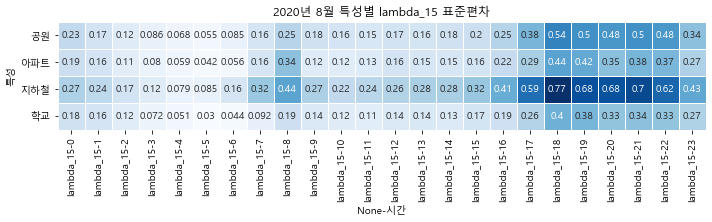

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.143160  0.123656  0.092362  0.062135  0.039478  0.057066  0.119508   
아파트  0.136559  0.139715  0.094866  0.064213  0.043941  0.057018  0.116696   
지하철  0.211985  0.210814  0.158353  0.112662  0.073714  0.057657  0.098075   
학교   0.114837  0.112429  0.074928  0.052820  0.035151  0.043093  0.097574   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.231644  0.285100  0.191628  0.172965  0.182488  0.197619  0.195776   
아파트  0.227027  0.280514  0.185004  0.158631  0.160157  0.175676  0.187707   
지하철  0.229430  0.401999  0.257488  0.232347  0.256466  0.281385  0.301825   
학교   0.184376  0.229500  0.157289  0.155504  0.152056  0.162214  0.173233   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.201997  0.247389  0.330876  0.464593  0.603072  0.511751  0.476882   
아파트  0.193636  0.216827  0.287097  0.375545  0.482956  0.424324  0.395597   
지하철  0.316449  0.383529  0.465586  0.685261  0.917720  0.726605  0.644362   
학교   0.170463  0.207954  0.258434  0.333723  0.387712  0.340126  0.314947   

                                   
시간         21        22        23  
특성                                 
공원   0.451613  0.358218  0.243164  
아파트  0.377812  0.311378  0.213731  
지하철  0.613907  0.511484  0.370838  
학교   0.301157  0.260958  0.185853

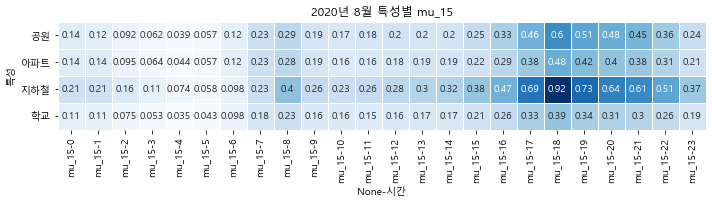

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.178126  0.137493  0.098009  0.076441  0.046983  0.055307  0.118364   
아파트  0.160084  0.128092  0.084197  0.067672  0.050024  0.058463  0.112505   
지하철  0.267347  0.214743  0.158637  0.115172  0.074187  0.058354  0.099357   
학교   0.145899  0.120522  0.084128  0.055650  0.044858  0.052653  0.117092   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.223128  0.275275  0.167112  0.142004  0.148867  0.157834  0.168657   
아파트  0.211575  0.275378  0.161704  0.132146  0.157931  0.155326  0.157117   
지하철  0.263025  0.445087  0.237406  0.196308  0.221412  0.244702  0.268679   
학교   0.191035  0.222643  0.135708  0.119274  0.119892  0.134372  0.139765   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.168894  0.212231  0.272832  0.380660  0.570973  0.466234  0.445818   
아파트  0.159647  0.173516  0.241106  0.336110  0.401932  0.349702  0.323608   
지하철  0.271547  0.328451  0.409493  0.619017  0.835209  0.693298  0.659773   
학교   0.137715  0.173940  0.206567  0.261051  0.332640  0.303160  0.300481   

                                   
시간         21        22        23  
특성                                 
공원   0.422596  0.335054  0.244596  
아파트  0.319426  0.270753  0.187614  
지하철  0.675229  0.566816  0.399610  
학교   0.297234  0.274724  0.195267

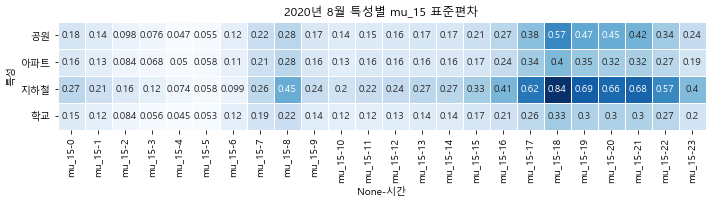

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.108815  1.319863  1.153056  1.492702  1.673896  0.817319  1.022250   
아파트  0.972573  1.321252  1.267127  1.336536  1.415597  0.795501  0.470368   
지하철  0.695692  1.029356  1.106126  1.152906  1.373817  1.631908  1.562282   
학교   1.100251  1.522442  1.684621  1.262636  1.339431  0.891452  0.668862   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.865431  1.004791  1.177879  0.864272  0.870722  1.007131  0.950532   
아파트  0.452563  0.683163  0.614058  0.743930  0.878451  0.953417  0.860662   
지하철  1.339815  1.049613  1.040957  0.997478  1.002038  1.015525  0.972159   
학교   0.901965  1.237170  0.976024  0.785121  0.846019  0.992546  0.889442   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.981647  0.932924  0.915175  0.830949  1.109055  1.247257  1.030211   
아파트  0.820122  0.859331  0.839028  0.959030  1.082082  1.138149  1.104869   
지하철  0.967985  0.905792  0.923815  0.886068  0.903455  0.903993  0.912259   
학교   0.948606  0.826021  0.847065  0.859044  1.162046  1.190913  1.124381   

                                   
시간         21        22        23  
특성                                 
공원   1.152506  1.377051  1.645922  
아파트  1.134640  1.382876  1.659689  
지하철  0.947780  1.047341  1.103682  
학교   1.190454  1.859692  1.933713

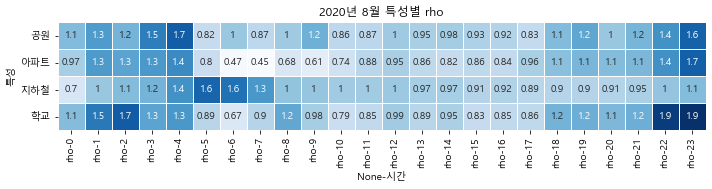

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.166793  1.421875  1.374656  1.398137  1.436245  0.978868  0.847837   
아파트  0.954217  1.270804  1.296588  1.318426  1.171461  0.778098  0.454581   
지하철  1.248874  1.728918  1.788345  1.794108  1.790379  2.062021  1.989991   
학교   0.792918  0.965055  1.036442  0.977516  0.914010  0.572968  0.460358   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.664800  1.040560  0.933463  0.984067  1.083286  1.204853  1.136114   
아파트  0.474417  0.664128  0.677537  0.787742  0.954979  1.022317  0.943932   
지하철  1.832104  1.606138  1.715249  1.714925  1.822678  1.852821  1.759836   
학교   0.468012  0.611074  0.658642  0.652627  0.714517  0.830528  0.777987   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.244272  1.168855  1.173354  1.245703  1.367253  1.379375  1.364654   
아파트  0.945649  0.919909  0.959697  1.057204  1.173351  1.236824  1.147564   
지하철  1.709053  1.618876  1.658224  1.555003  1.576004  1.642009  1.623487   
학교   0.810068  0.744488  0.774214  0.821073  0.939236  0.969408  0.929599   

                                   
시간         21        22        23  
특성                                 
공원   1.451569  1.629300  1.614355  
아파트  1.245870  1.380173  1.457637  
지하철  1.680602  1.778164  1.743887  
학교   1.001094  1.081251  1.126728

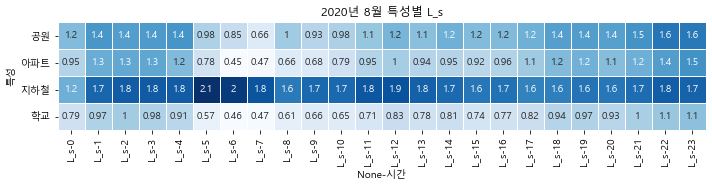

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.701136  1.959923  1.871502  1.791647  1.911694  1.598835  1.359021   
아파트  1.408835  1.507242  1.447895  1.540583  1.477051  1.083980  0.759514   
지하철  1.970061  2.115516  2.138649  2.242496  2.407335  2.981359  2.672704   
학교   1.254037  1.232702  1.316184  1.310671  1.323369  0.887677  0.945811   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.238289  1.628800  1.287450  1.225240  1.331555  1.292227  1.219747   
아파트  0.820644  0.955747  0.813780  0.936684  1.015931  1.140698  0.981413   
지하철  2.526968  1.933782  2.026265  2.142287  2.199913  2.413409  2.228823   
학교   0.826493  0.927822  0.908896  0.934125  0.935639  1.083082  0.946110   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.309995  1.233641  1.315883  1.431976  1.555380  1.476034  1.453268   
아파트  0.968327  0.957595  0.956620  1.053453  1.216071  1.320121  1.184824   
지하철  1.933416  1.896928  1.863258  1.740053  1.657602  2.089178  2.103364   
학교   1.022071  0.994508  0.949158  1.046229  1.255532  1.303946  1.187971   

                                   
시간         21        22        23  
특성                                 
공원   1.673455  1.874664  1.873379  
아파트  1.320950  1.475255  1.591021  
지하철  2.016650  2.190590  2.155734  
학교   1.232817  1.305287  1.366097

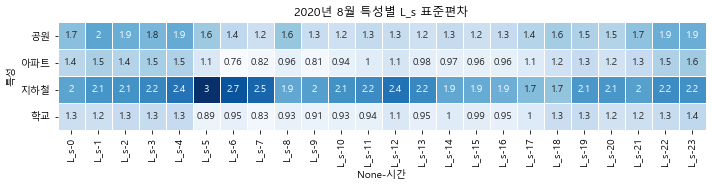

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원   11.084421  15.413752  22.189791  42.894548  52.214955  31.087203   
아파트   6.084575  12.928372  19.057038  32.856825  46.199450  31.049492   
지하철   5.892032  13.314526  16.947081  27.229605  45.443539  54.804753   
학교    7.063897  11.565401  21.263294  29.591283  40.235591  31.693932   

                                                                              \
시간          6          7         8          9         10        11        12   
특성                                                                             
공원   19.482630   9.034421  7.213055  10.237712  8.718679  8.221630  8.347653   
아파트  11.168756   5.739222  5.780649   6.892966  7.725106  8.915806  7.884857   
지하철  31.374753  13.524704  6.645156   8.724999  8.684642  8.388682  7.606979   
학교   14.256958  12.090834  6.919986   7.446885  6.724649  6.925493  6.704750   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   7.772746  7.809505  6.339589  4.548815  3.406351  2.975160  3.234493   
아파트  7.177279  6.493995  5.623238  4.461735  3.747353  2.741145  3.069954   
지하철  6.928453  6.375560  5.151073  4.273015  2.887758  2.180217  2.738114   
학교   5.997817  6.214133  4.964087  4.115004  3.197714  2.841077  3.290727   

                                             
시간         20        21        22        23  
특성                                           
공원   3.618302  4.114356  5.121775  8.984102  
아파트  3.275551  3.552874  4.588324  7.361062  
지하철  3.121894  3.409967  4.394443  6.228181  
학교   3.829242  4.028655  6.289011  8.813453

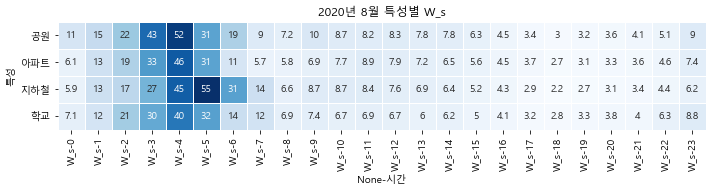

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원   23.683602  20.003281  26.050168  97.463253  79.801232  47.606175   
아파트   9.357648  20.828499  26.635499  52.789892  78.249849  52.538871   
지하철   7.549763  33.271943  20.572738  43.759251  83.277700  77.814505   
학교   11.191027  17.713573  28.788600  54.728228  62.547112  64.469965   

                                                                      \
시간          6          7          8          9         10         11   
특성                                                                     
공원   31.893287  17.460319   8.609366  24.149900  8.242022   6.729271   
아파트  17.998042   7.872233  11.333354   7.099963  7.303337  11.655356   
지하철  39.330300  17.526605   8.549720   7.608906  6.586385   6.640737   
학교   26.587554  37.185155  10.612914   8.832170  6.461898   6.394289   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   7.902268  6.253897  5.636380  4.835354  3.362609  2.595235  2.544916   
아파트  7.485314  8.466207  5.788586  4.902171  4.134859  4.168373  2.176800   
지하철  5.962522  5.356998  4.616603  3.725704  2.886980  2.088038  1.506277   
학교   6.062197  5.044560  5.267366  4.402566  3.607904  2.829522  2.382145   

                                                         
시간         19        20        21         22         23  
특성                                                       
공원   2.348879  2.791186  4.518376   3.783486  13.269006  
아파트  2.522826  2.756267  2.991972   3.941453   7.286120  
지하철  1.744245  2.020220  2.369327   3.514457   6.020500  
학교   3.398315  5.252642  3.897407  12.934761  14.545972

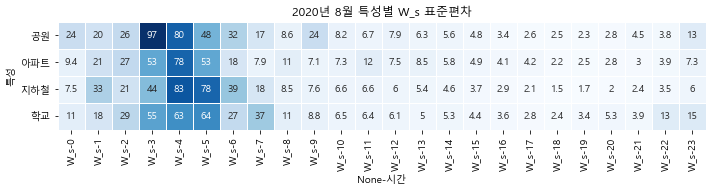

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 8월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()